# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(27)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


In [3]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = base_url + "appid=" + weather_api_key + "&units=metric&q="

response = requests.get(query_url + cities[1]).json()
response

{'coord': {'lon': -22.4338, 'lat': 63.8424},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 12.26,
  'feels_like': 12.15,
  'temp_min': 11.97,
  'temp_max': 12.26,
  'pressure': 991,
  'humidity': 100},
 'visibility': 8000,
 'wind': {'speed': 8.23, 'deg': 130},
 'clouds': {'all': 100},
 'dt': 1660026326,
 'sys': {'type': 1,
  'id': 90,
  'country': 'IS',
  'sunrise': 1660021457,
  'sunset': 1660082779},
 'timezone': 0,
 'id': 3416888,
 'name': 'Grindavik',
 'cod': 200}

In [4]:
dt = 1660025415


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = base_url + "appid=" + weather_api_key + "&units=metric&q="

# Set up lists to hold reponse info
number = 0
name = []
lat = []
long = []
temp = []
humid = []
cloud = []
windspd = []
country = []
date_time = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        timestamp = response['dt']
        date_time.append(datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))
        number += 1
        print(f"{number}: {city}\n")
    except:
        print(f"There was an error in retrieving the data for {city}\n")
        continue


There was an error in retrieving the data for samusu

1: grindavik

There was an error in retrieving the data for turtkul

2: tasiilaq

3: francistown

4: longyearbyen

5: barrow

6: albany

7: severo-kurilsk

8: tezu

9: kangaatsiaq

10: yellowknife

11: ellsworth

There was an error in retrieving the data for khonuu

12: busselton

13: jamestown

There was an error in retrieving the data for grand river south east

14: nikolskoye

15: ushuaia

16: mataura

17: rikitea

18: souillac

19: beringovskiy

20: chuy

21: port alfred

22: constantine

23: east london

24: araouane

25: broome

26: puerto ayora

27: kapaa

28: maloy

29: talnakh

30: bethel

There was an error in retrieving the data for vaitupu

31: lazaro cardenas

32: cape town

33: vaini

34: det udom

35: bredasdorp

36: bluff

37: solnechnyy

There was an error in retrieving the data for barentsburg

38: fortuna

39: camargo

40: viransehir

41: college

42: port lincoln

43: vanimo

44: norman wells

There was an error 

In [6]:
# Print the city count to confirm sufficient count
print(f"There are {len(name)} cities in the dataset.")

There are 548 cities in the dataset.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a data frame from lists of response info
cities_df = pd.DataFrame({"City": name,
                            "Latitude": lat,
                            "Longitude": long,
                            "Temperature (C)": temp,
                            "Humidity (%)": humid,
                            "Cloudiness (%)": cloud,
                            "Wind Speed (m/s)": windspd,
                            "Country": country,
                            "Date Time": date_time}).rename_axis("ID")

cities_df.to_csv(output_data_file, index=False, header=True)

cities_df


,City,Latitude,Longitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date Time
ID,,,,,,,,,
0,Grindavik,63.8424,-22.4338,12.26,100,100,8.23,IS,2022-08-09 06:25:28
1,Tasiilaq,65.6145,-37.6368,5.09,95,98,2.88,GL,2022-08-09 06:25:29
2,Francistown,-21.1700,27.5079,15.53,17,0,2.85,BW,2022-08-09 06:25:30
3,Longyearbyen,78.2186,15.6401,7.91,87,75,4.63,SJ,2022-08-09 06:21:36
4,Barrow,71.2906,-156.7887,6.01,70,100,3.09,US,2022-08-09 06:25:31
...,...,...,...,...,...,...,...,...,...
543,Kieta,-6.2167,155.6333,27.71,78,56,2.13,PG,2022-08-09 06:34:34
544,Sinnamary,5.3833,-52.9500,24.95,87,57,4.91,GF,2022-08-09 06:34:35
545,Agirish,61.9247,63.0231,26.10,41,9,3.23,RU,2022-08-09 06:34:36


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
print(f"There are {len(cities_df.loc[cities_df['Humidity (%)'] > 100, :])} cities in the dataset with a humidity greater than 100%.")


There are 0 cities in the dataset with a humidity greater than 100%.


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

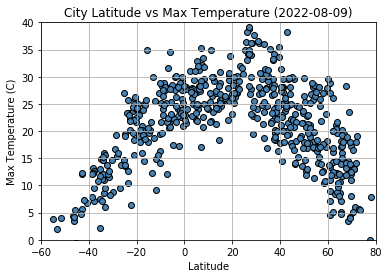

In [31]:
plt.scatter(cities_df["Latitude"], cities_df["Temperature (C)"], color = "SteelBlue", edgecolors= "black")

title_date = cities_df["Date Time"][0].split()[0]

plt.title(f"City Latitude vs Max Temperature ({title_date})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60,80)
plt.ylim(0,40)

plt.savefig("../output_data/fig1.png")

plt.show()


This graph represents the relationship between a city's distance from the equator (ie latitude) and its maximum temperature for a given day.

## Latitude vs. Humidity Plot

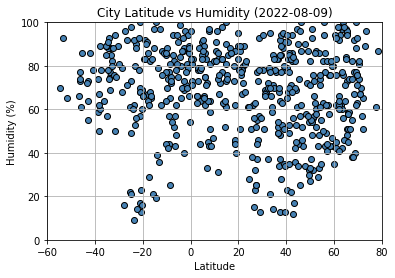

In [32]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"], color = "SteelBlue", edgecolors= "black")

plt.title(f"City Latitude vs Humidity ({title_date})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60,80)
plt.ylim(0,100)

plt.savefig("../output_data/fig2.png")

plt.show()

This graph represents the relationship between a city's distance from the equator (ie latitude) and its humidity for a given day.

## Latitude vs. Cloudiness Plot

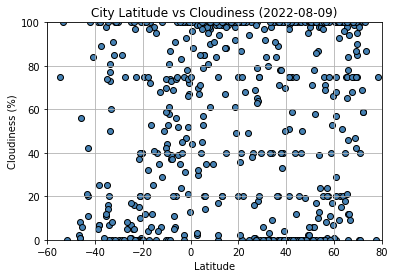

In [33]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness (%)"], color = "SteelBlue", edgecolors= "black")

plt.title(f"City Latitude vs Cloudiness ({title_date})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60,80)
plt.ylim(0,100)

plt.savefig("../output_data/fig3.png")

plt.show()

This graph represents the relationship between a city's distance from the equator (ie latitude) and its cloudiness for a given day.

## Latitude vs. Wind Speed Plot

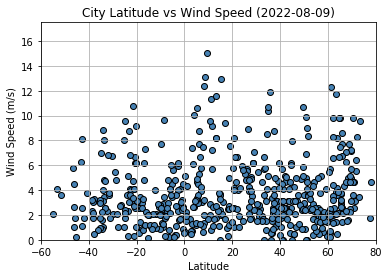

In [34]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (m/s)"], color = "SteelBlue", edgecolors= "black")

plt.title(f"City Latitude vs Wind Speed ({title_date})")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60,80)
plt.ylim(0,17.5)

plt.savefig("../output_data/fig4.png")

plt.show()


This graph represents the relationship between a city's distance from the equator (ie latitude) and its wind speed for a given day.

## Linear Regression

In [13]:
# Separate the dataset into dataframes for North and South Hemisphere
nth_hem_df = cities_df.loc[cities_df['Latitude'] > 0, :]
sth_hem_df = cities_df.loc[cities_df['Latitude'] < 0, :]


In [14]:
# Create a function to calculate linear regression for each graph

def linreg(x,y,hem):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, color = "SteelBlue", edgecolors= "black")
    plt.plot(x,regress_values, color = "red", alpha=0.6)
    #plt.annotate(line_eq,pos,fontsize=15,color="red", alpha=0.8) 
    plt.title(f"{x.name} vs {y.name} {hem}ern Hemisphere")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    print(f"The linear regression equation for these factors is:\n{line_eq}\n")
    correlation = st.pearsonr(x,y)
    if correlation[0] > 0:
        correlation_direction = "positive"
    else:
        correlation_direction = "negative"
    if abs(correlation[0]) < 0.3:
        correlation_type = "no correlation"
    elif abs(correlation[0]) < 0.5:
        correlation_type = f"a weak {correlation_direction} correlation"
    elif abs(correlation[0]) < 0.7:
        correlation_type = f"a moderate {correlation_direction} correlation"
    else:
        correlation_type = f"a strong {correlation_direction} correlation"
    print(f"The correlation coefficient for these factors is {round(correlation[0],2)}")
    print(f"This indicates {correlation_type} between these factors.")

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

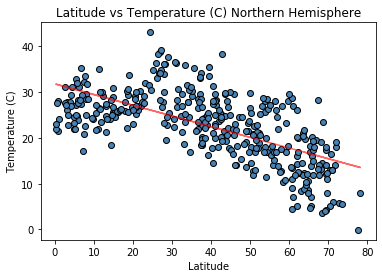

The linear regression equation for these factors is:
y = -0.23x + 31.81

The correlation coefficient for these factors is -0.64
This indicates a moderate negative correlation between these factors.


In [15]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Temperature (C)"], "North")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

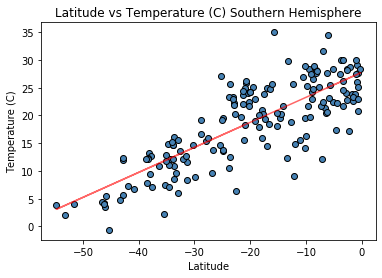

The linear regression equation for these factors is:
y = 0.45x + 27.77

The correlation coefficient for these factors is 0.8
This indicates a strong positive correlation between these factors.


In [16]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Temperature (C)"],"South")

##### Analysis  
These results suggest a relationship between latitude and temperature.  
This confirms what would be expected as it is known that areas near the equator receive more heat from the sun.  
A moderate correlation has been returned for the North hemisphere and a strong correlation for the South hemisphere.  
From these results could use the linear regression equation to make a reasonable estimate of the maximum daily temperature for a city, when given it's latitude.  
Note that the linear regression equations for each hemisphere are significantly different. This could be due to sampling error. It would warrant further investigation.  
Ideally both equations should have the same (or near equal) intercept. This would make sense logically as for both equations the intercept represents the same real world value, ie the temperature at the equator.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

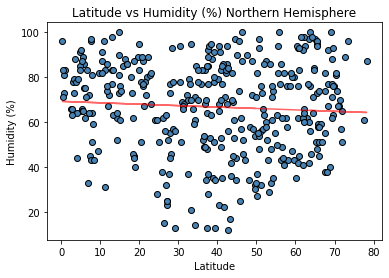

The linear regression equation for these factors is:
y = -0.06x + 69.23

The correlation coefficient for these factors is -0.06
This indicates no correlation between these factors.


In [17]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Humidity (%)"], "North")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

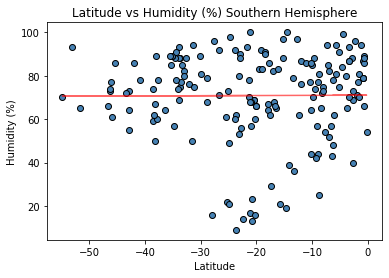

The linear regression equation for these factors is:
y = 0.01x + 71.04

The correlation coefficient for these factors is 0.01
This indicates no correlation between these factors.


In [18]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Humidity (%)"],"South")

##### Analysis  
These results suggest there is no relationship between latitude and humidity.  
This result is interesting as it challenges preconceived notions of the areas near the equator (colloquially, the "tropics") as having humid (or "tropical") weather.  
It should be noted that in the Northern Hemisphere graph there is a visible cluster of cities with a humidity of 75% or more, within close range of the equator. But this cluster is not significant enough to suggest a correlation.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

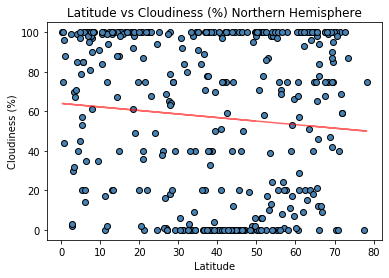

The linear regression equation for these factors is:
y = -0.18x + 64.0

The correlation coefficient for these factors is -0.09
This indicates no correlation between these factors.


In [19]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Cloudiness (%)"], "North")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

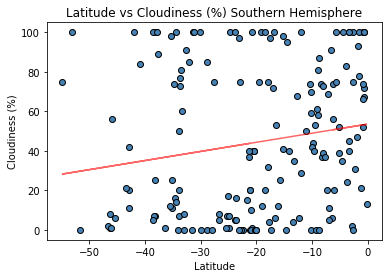

The linear regression equation for these factors is:
y = 0.46x + 53.55

The correlation coefficient for these factors is 0.17
This indicates no correlation between these factors.


In [20]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Cloudiness (%)"],"South")

##### Analysis  
These results suggest there is no relationship between latitude and cloudiness.  
The main statistical characteristic of the cloudiness data is it's high variability.  
The datapoints are heavily represented near the 0 minimum and 100% maximum.

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

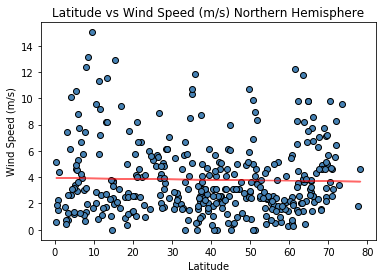

The linear regression equation for these factors is:
y = -0.0x + 3.94

The correlation coefficient for these factors is -0.03
This indicates no correlation between these factors.


In [21]:
linreg(nth_hem_df["Latitude"],nth_hem_df["Wind Speed (m/s)"], "North")

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

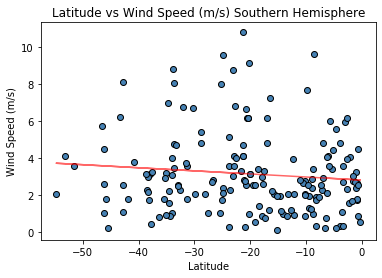

The linear regression equation for these factors is:
y = -0.02x + 2.83

The correlation coefficient for these factors is -0.1
This indicates no correlation between these factors.


In [22]:
linreg(sth_hem_df["Latitude"],sth_hem_df["Wind Speed (m/s)"],"South")

##### Analysis  
These results suggest there is no relationship between latitude and wind speed.  
A notable point from the data is that the respective linear regression equations are closer to each other than for any of the other graphs.